In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("bmh")

In [77]:
# A training model using linear regression
# r^2 = 1 - SE~y/SEm(y)
import numpy as np

def mean(arr):
    """Returns mean of array"""
    
    return sum(arr)/len(arr)

def findCoefs(xs, ys):
    """Find correlation b/n xs and ys"""
    
    m = ( (mean(xs)*mean(ys) - mean(xs*ys)) / 
         (mean(xs)**2 - mean(xs**2)) )
    
    b = mean(ys) - m*mean(xs)
    
    return np.array([m, b])

def bestFitLine(xs, ys):
    
    coefs = findCoefs(xs, ys)
    ysFit = [(coefs[0]*x+coefs[1]) for x in xs]
    
    return np.array(ysFit)

def squaredError(ysOrig, ysLine): 
    
    return sum( (ysLine-ysOrig)**2 )

def coefDetermination(ysOrig, ysLine):
    
    ysMeanLine = [mean(ysOrig) for _ in ysOrig]
    
    sqErrorLine = squaredError(ysOrig, ysLine)
    sqErrorMean = squaredError(ysOrig, ysMeanLine)
    
    return 1 - sqErrorLine/sqErrorMean

In [78]:
df = pd.read_csv("GOOG.csv")
df = df[["Close"]]
future = 30
df["Target"] = df["Close"].shift(-future)
#df.head()

In [86]:
X = np.array(df["Close"])[:-future]
y = np.array(df["Target"])[:-future]

y_pred = bestFitLine(X, y)

coef = findCoefs(X, y)

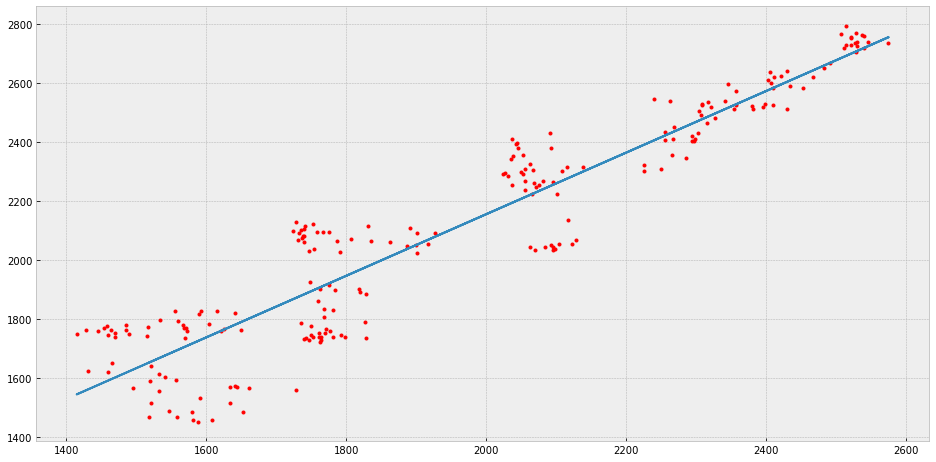

In [80]:
plt.figure(figsize=(16,8))
plt.plot(X, y, "r.")
plt.plot(X, y_pred)
plt.show()

In [106]:
coefDetermination(y, y_pred)

0.8780572688335399

In [103]:
X_future = X[-future:]
X_future = np.array(X_future)

y_ = [(coef[0]*x+coef[1]) for x in X_future]
df["Target"][-future:] = y_

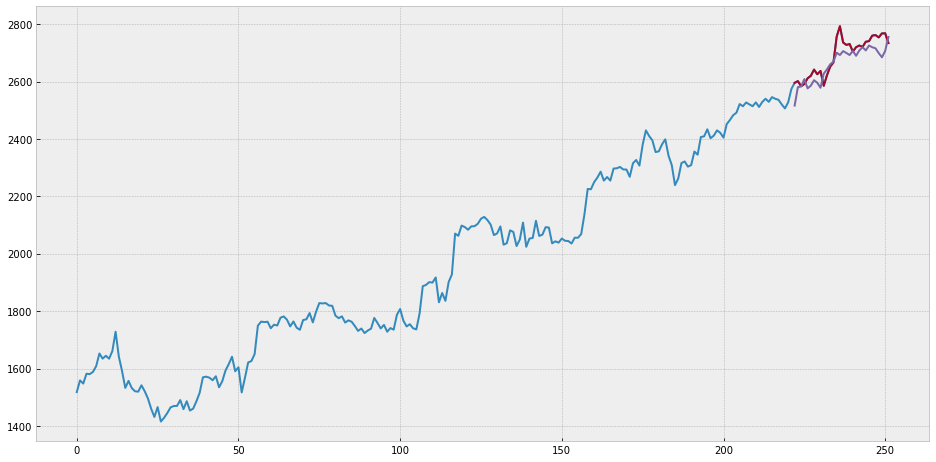

In [104]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"])
plt.plot(df["Close"][-future:])
plt.plot(df["Target"][-future:])